In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pickle as pkl
import seaborn as sns
import pandas as pd

from scipy import stats

import sys

import utils.trace_metric as trace_metric

In [2]:
seeds = [1, 3, 6, 9]

result = {}

with open('test_configs/results/result_5811235.pkl', 'rb') as f:
    result = pkl.load(f)
    
trace_list = result.keys()

In [3]:
trace_list

dict_keys(['pmd-small-0-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-1-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-2-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-3-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-4-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-5-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-6-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-7-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-8-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl', 'pmd-small-9-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl'])

In [4]:
with open('test_configs/results/trace_length_dict.pkl', 'rb') as f:
    trace_length_dict = pkl.load(f)

In [5]:
trace_length_dict['wupwise-ref-wupwise-d-l64-p4096-w100000i.analyzed-1'][0]

trace_length_dict = { key: val[0] for key, val in trace_length_dict.items() }

In [6]:
trace_length_dict

{'wupwise-ref-wupwise-d-l64-p4096-w100000i.analyzed-1': 3633057,
 'xalan-default-J9-d-l64-p4096-w100000i.analyzed-1': 228269,
 'fop-small-HotSpot-d-l64-p4096-w100000i.analyzed-1': 71050,
 'xalan-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 52515,
 'mcf-ref-mcf-d-l64-p4096-w100000i.analyzed-1': 453500,
 'xalan-default-HotSpot-d-l64-p4096-w100000i.analyzed-1': 221292,
 'luindex-small-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 30811,
 'lucas-ref-lucas-d-l64-p4096-w100000i.analyzed-1': 2858648,
 'equake-ref-equake-d-l64-p4096-w100000i.analyzed-1': 1019616,
 'jython-default-HotSpot-d-l64-p4096-w100000i.analyzed-1': 749053,
 'fop-default-J9-d-l64-p4096-w100000i.analyzed-1': 147646,
 'pmd-small-2-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 23818,
 'apsi-ref-apsi-d-l64-p4096-w100000i.analyzed-1': 4094971,
 'eclipse-default-JikesRVM-d-l64-p4096-w100000i.analyzed-1': 835300,
 'lusearch-small-HotSpot-d-l64-p4096-w100000i.analyzed-1': 84023,
 'eclipse-small-HotSpot-d-l64-p4096-w100000i.analyzed

number of points: 100


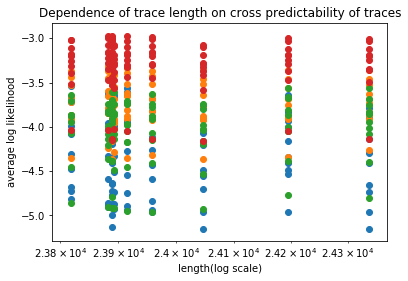

In [7]:
for seed in seeds:
    length_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list:
        for trace_test in trace_list:

            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                try:
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                except IndexError:
                    continue

            average_kldiv = np.mean(test_kldiv)

            length_list.append(trace_length_dict[trace_train.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    plt.scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
plt.xlabel("length(log scale)")
plt.xscale("log")
plt.ylabel("average log likelihood")
plt.title("Dependence of trace length on cross predictability of traces")
plt.show()
# plt.savefig("trace_length_correlation_cross.png")


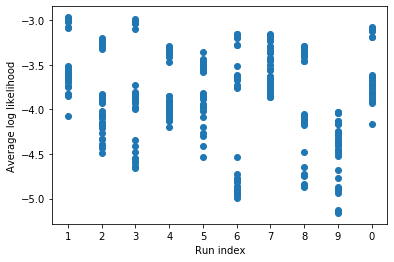

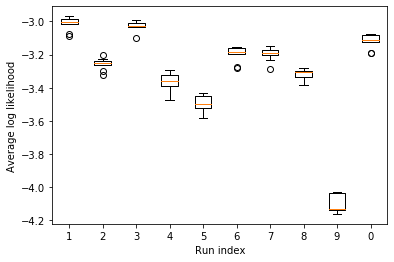

In [8]:
x_list = []
y_list = []
for seed in seeds:
    length_list = []
    avgkl_list = {}
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list:
        for trace_test in trace_list:

            if trace_train == trace_test:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                try:
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                except IndexError:
                    continue

            average_kldiv = np.mean(test_kldiv)

            length_list.append(trace_length_dict[trace_train.split('.p')[0]])
            
            if trace_test not in avgkl_list.keys():
                avgkl_list[trace_test] = []
           
            x_list.append(trace_test.split('-')[2])
            y_list.append(average_kldiv)
            avgkl_list[trace_test].append(average_kldiv)
#         break

# print(len(x_list))
# print(y_list)

plt.scatter(x_list, y_list)
plt.ylabel("Average log likelihood")
plt.xlabel("Run index")
plt.show()

x_list = [ val for key, val in avgkl_list.items() ]
label_list = [ key.split('-')[2] for key, val in avgkl_list.items() ]

plt.boxplot(x_list, labels=label_list)
plt.ylabel("Average log likelihood")
plt.xlabel("Run index")
plt.show()

number of points: 90


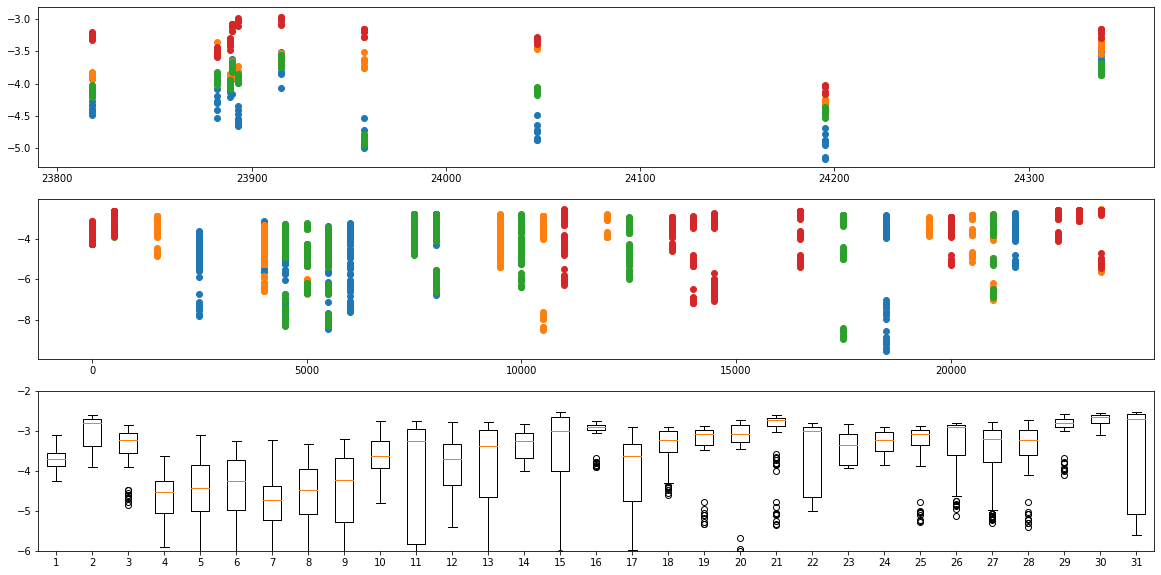

In [11]:
fig, axs = plt.subplots(3, 1, figsize=(20,10))

boxplot_dict = {}

for seed in seeds:
    length_list = []
    trace_point = []
    kl_list = []
    avgkl_list = []
    #     print("Seed: {}".format(seed))
    for trace_train in trace_list:
        for trace_test in trace_list:

            if trace_train == trace_test:
                continue
            
            if trace_length_dict[trace_test.split('.p')[0]] > 1000000:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                test_trace_length = trace_length_dict[trace_train.split('.p')[0]]
                
                try:
#                     if key > length_min:
#                         continue
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                    
                    trace_point.append(key)
                    kl_list.append(test_kldiv[-1])
                    
                except (IndexError, TypeError):
                    continue

            average_kldiv = np.mean(test_kldiv)

            # factor computation
#             len_factor = trace_length_dict[trace_test.split('.p')[0]]/length_norm
            
            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    axs[0].scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])
    
    sort_ids = np.argsort(trace_point)
    axs[1].scatter(np.array(trace_point)[sort_ids], 
            np.array(kl_list)[sort_ids])
    
    for idx, point in enumerate(trace_point):
        point_trace_p = 200
        if int(point/point_trace_p) not in boxplot_dict.keys():
            boxplot_dict[int(point/point_trace_p)] = []
            
        boxplot_dict[int(point/point_trace_p)].append(kl_list[idx])
        
#     axs[1].scatter(np.array(trace_points)[sort_ids], 
#             np.array(avgkl_list)[sort_ids])

print("number of points: {}".format(len(length_list)))
# plt.legend()
# axs[0].xlabel("length(log scale)")
# axs[0].xscale("log")
# axs[0].ylabel("average log likelihood")
# axs[0].title("Dependence of trace length on cross predictability of traces")

key_list = np.sort(list(boxplot_dict.keys()))

boxplot_mat = [ boxplot_dict[key] for key in key_list ]
axs[2].set_ylim([ -6, -2 ])
axs[2].boxplot(boxplot_mat)

plt.show()
# plt.savefig("test_trace_length_correlation_cross.png")

number of points: 40
0. trace test: pmd-small-0-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


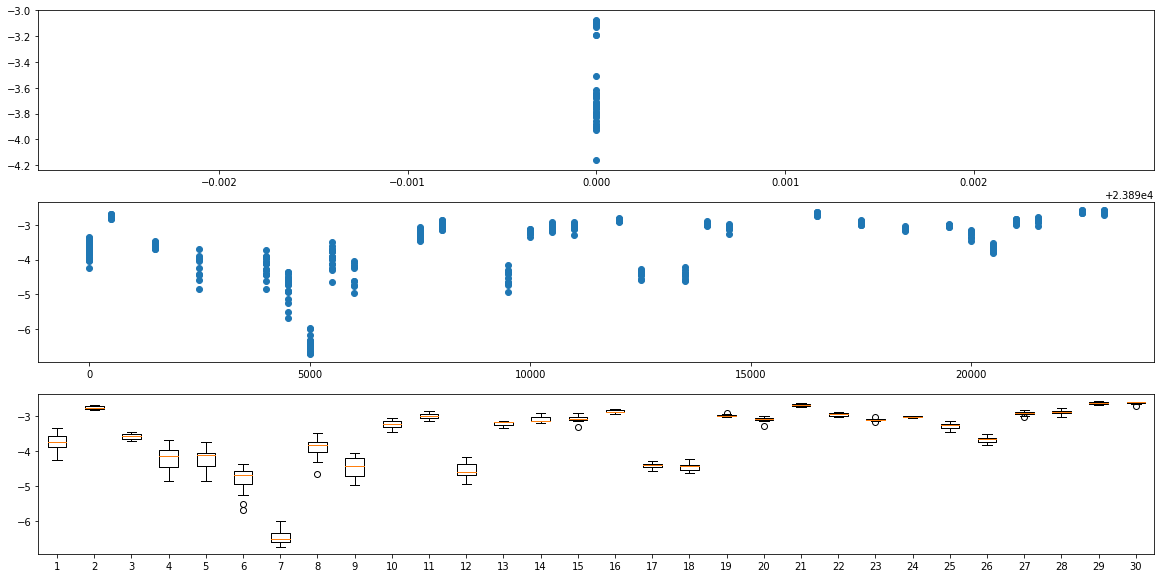

number of points: 40
1. trace test: pmd-small-1-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


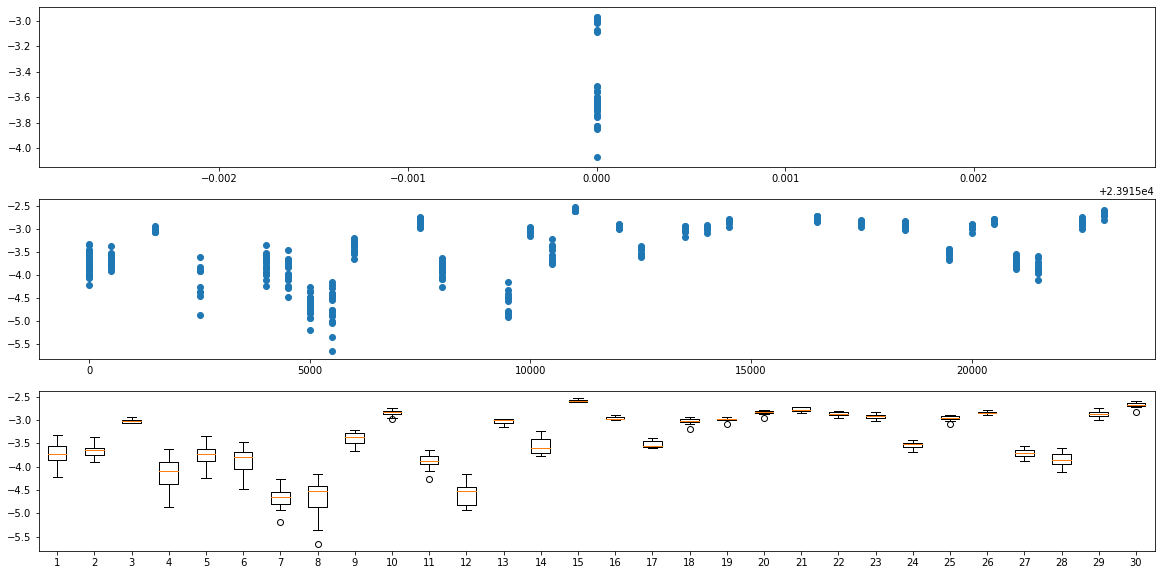

number of points: 40
2. trace test: pmd-small-2-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


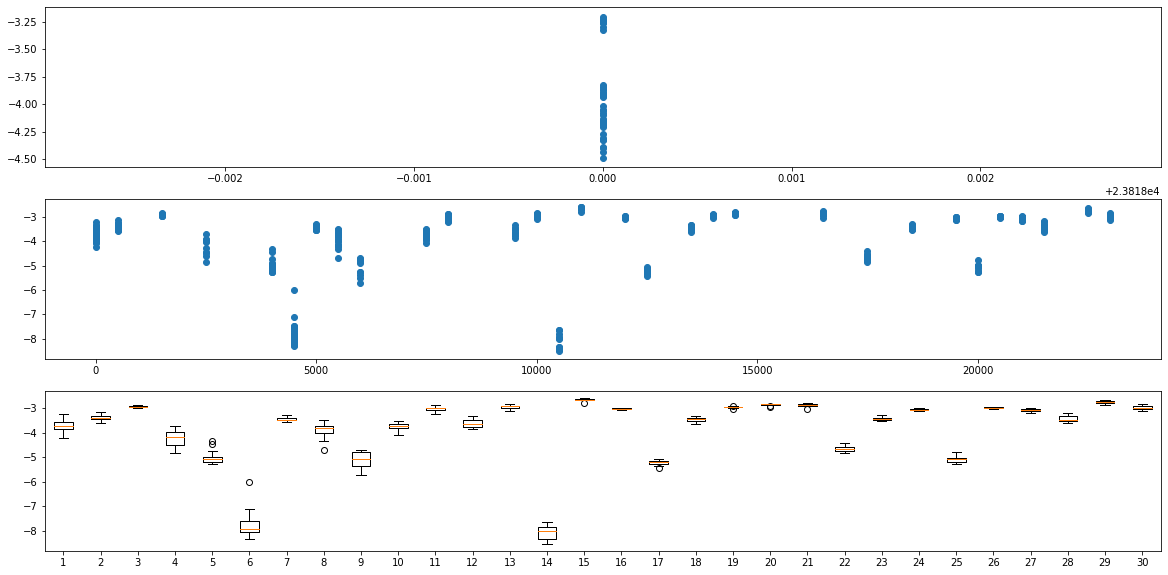

number of points: 40
3. trace test: pmd-small-3-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


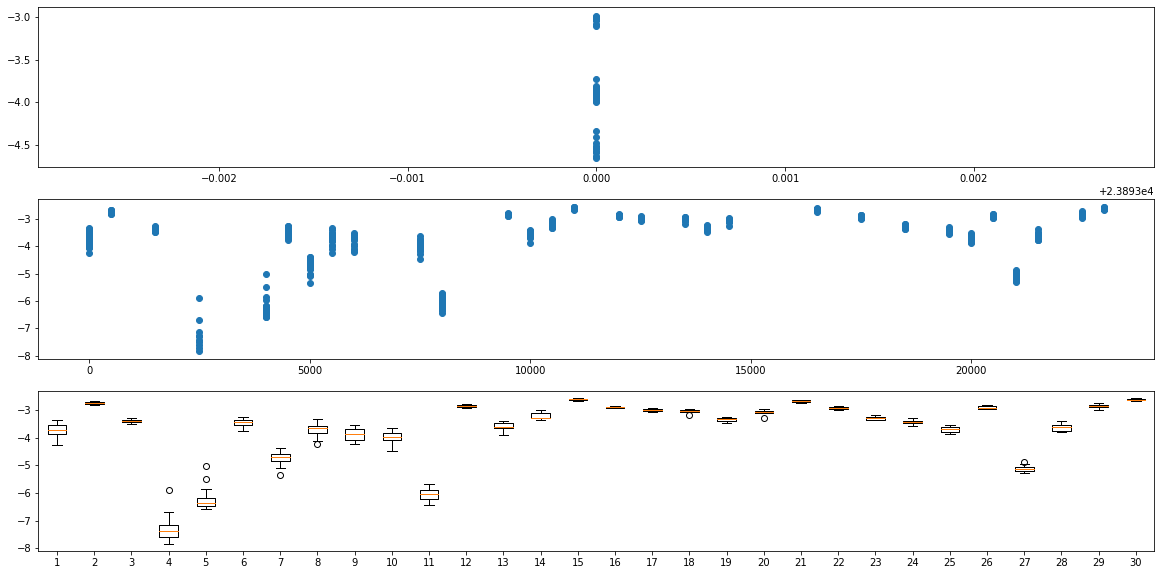

number of points: 40
4. trace test: pmd-small-4-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


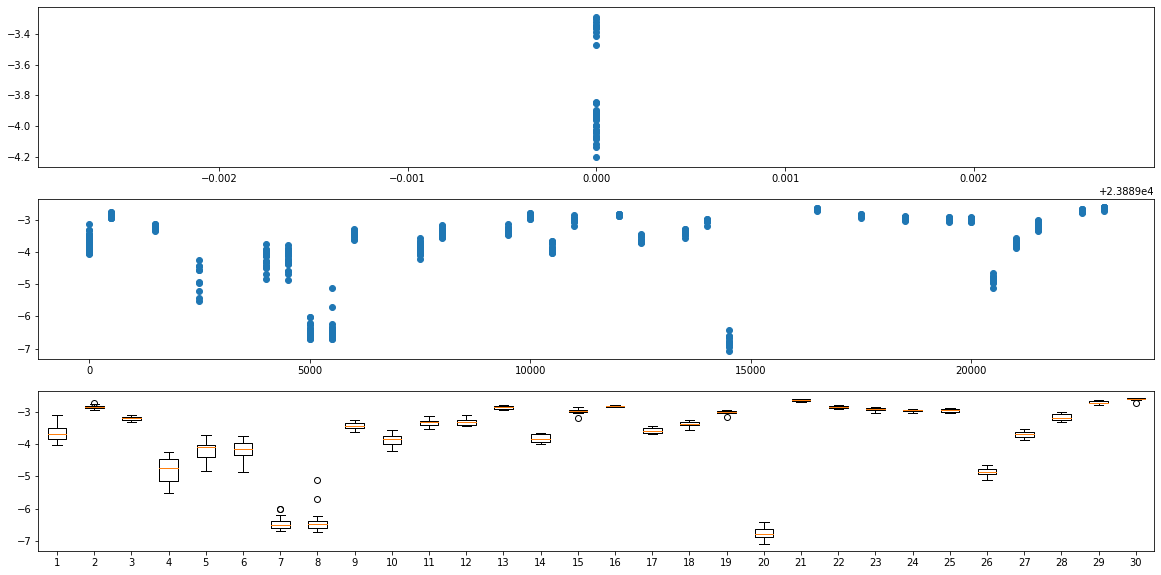

number of points: 40
5. trace test: pmd-small-5-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


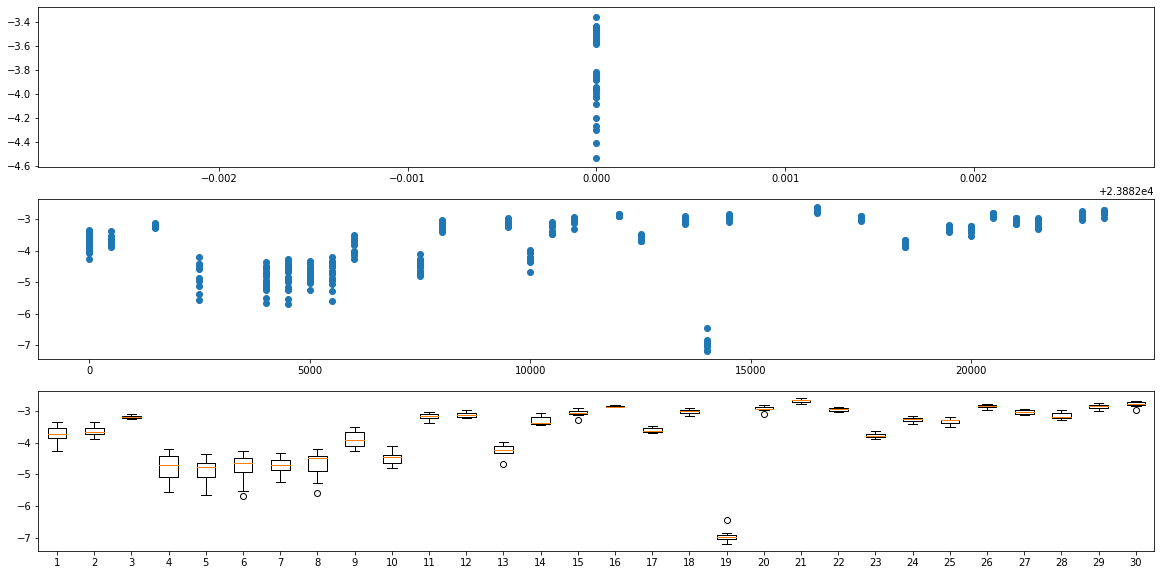

number of points: 40
6. trace test: pmd-small-6-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


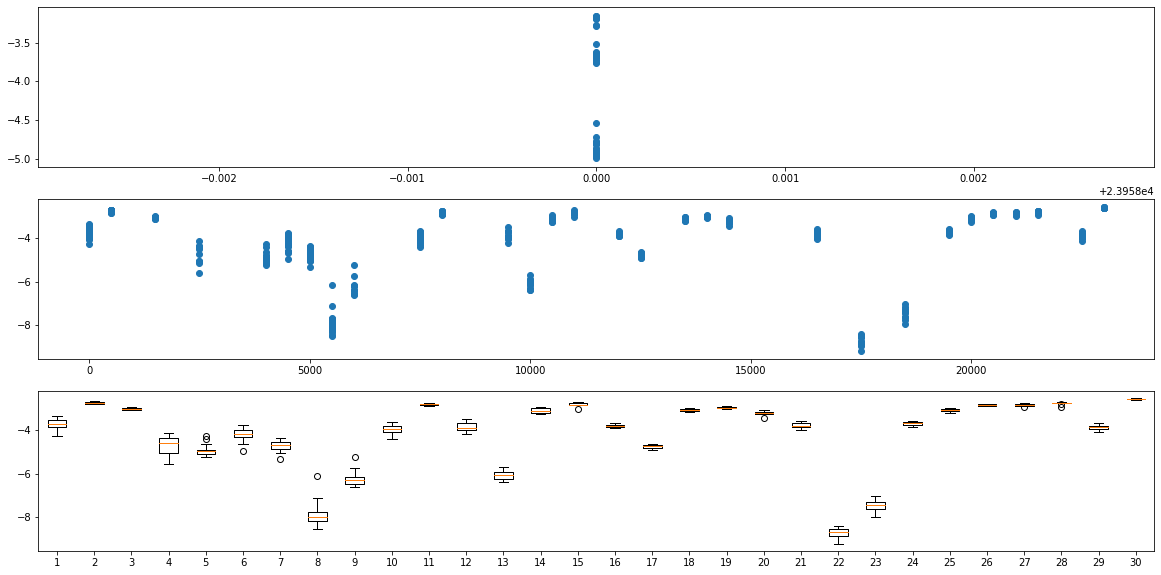

number of points: 40
7. trace test: pmd-small-7-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


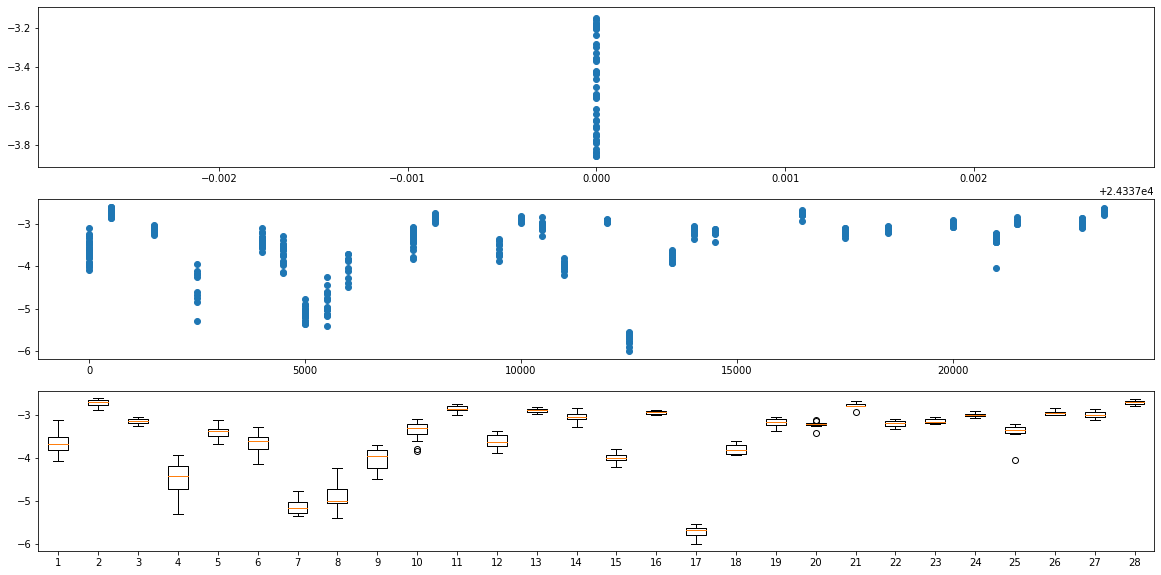

number of points: 40
8. trace test: pmd-small-8-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


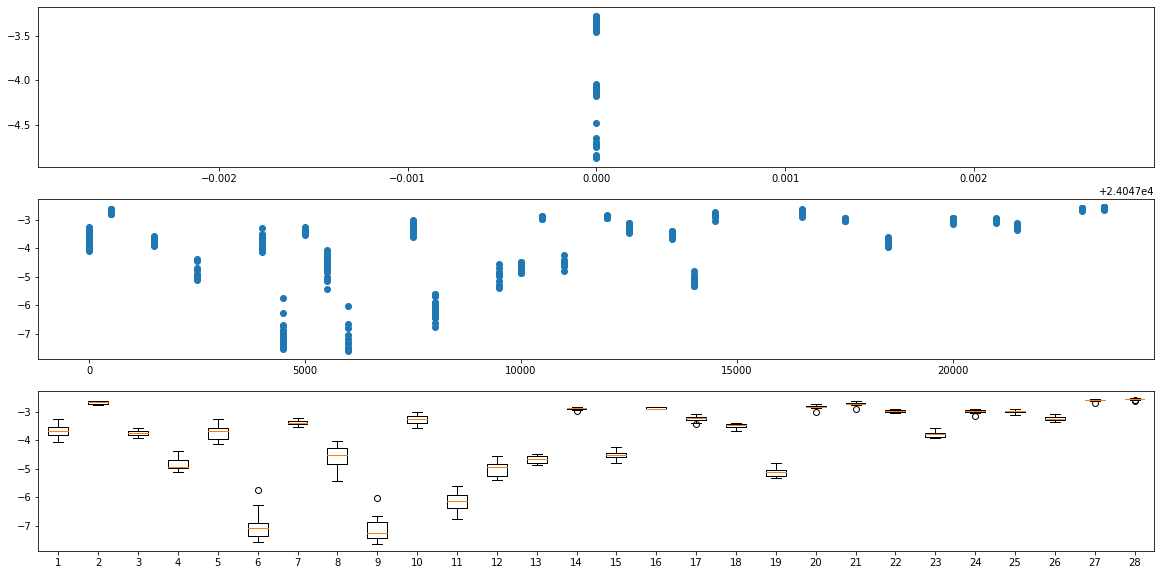

number of points: 40
9. trace test: pmd-small-9-JikesRVM-d-l64-p4096-w100000i.analyzed-1.pkl


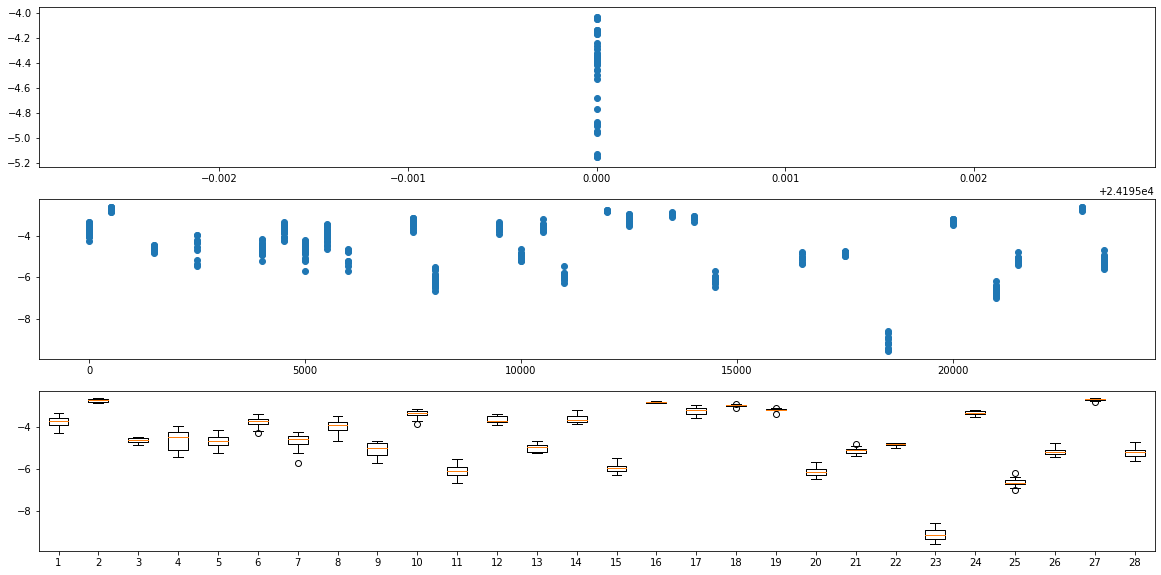

In [20]:
for idx1, trace_test in enumerate(trace_list):
    boxplot_dict = {}
    length_list = []
    trace_point = []
    kl_list = []
    avgkl_list = []
    fig, axs = plt.subplots(3, 1, figsize=(20,10))
    #     print("Seed: {}".format(seed))
    for seed in seeds:
        for trace_train in trace_list:

#             if trace_train == trace_test:
#                 continue
            
            if trace_length_dict[trace_test.split('.p')[0]] > 1000000:
                continue
            
            test_kldiv = []
            
            for key in result[trace_train][trace_test][seed].keys():
                test_trace_length = trace_length_dict[trace_train.split('.p')[0]]
                
                try:
#                     if key > length_min:
#                         continue
                    test_kldiv.append(-result[trace_train][trace_test][seed][key]["average_loglikelihood"])
                    
                    trace_point.append(key)
                    kl_list.append(test_kldiv[-1])
                    
                except (IndexError, TypeError):
                    continue

            average_kldiv = np.mean(test_kldiv)
            
            length_list.append(trace_length_dict[trace_test.split('.p')[0]])
            avgkl_list.append(average_kldiv)

    sort_ids = np.argsort(length_list)
    axs[0].scatter(np.array(length_list)[sort_ids], 
            np.array(avgkl_list)[sort_ids])
    
    sort_ids = np.argsort(trace_point)
    axs[1].scatter(np.array(trace_point)[sort_ids], 
            np.array(kl_list)[sort_ids])
    
    for idx, point in enumerate(trace_point):
        point_trace_p = 200
        if int(point/point_trace_p) not in boxplot_dict.keys():
            boxplot_dict[int(point/point_trace_p)] = []
            
        boxplot_dict[int(point/point_trace_p)].append(kl_list[idx])
        
    #     axs[1].scatter(np.array(trace_points)[sort_ids], 
    #             np.array(avgkl_list)[sort_ids])

    print("number of points: {}".format(len(length_list)))
    # plt.legend()
    # axs[0].xlabel("length(log scale)")
    # axs[0].xscale("log")
    # axs[0].ylabel("average log likelihood")
    # axs[0].title("Dependence of trace length on cross predictability of traces")

    key_list = np.sort(list(boxplot_dict.keys()))

    boxplot_mat = [ boxplot_dict[key] for key in key_list ]
#     axs[2].set_ylim([ -6, -2 ])
    axs[2].boxplot(boxplot_mat)

    print("{}. trace test: {}".format(idx1, trace_test))
    plt.show()
    # plt.savefig("test_trace_length_correlation_cross.png")